In [32]:
#import
import numpy as np
import cv2 as cv
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn import metrics
import os
import math

In [61]:
def load_image(imgp):
    img = cv.imread(imgp)
    
    return img

def siftcomp(sift):
    kp, des = sift.detectAndCompute(img,None)
    
def setpix(x, y):
    return(math.atan((x-1512) / 3360), math.atan((y-2016) / 3360))

def pixset(ax, ay):
    return(1512 + math.tan(ax)*3360, 2016 + math.tan(ay)*3360)

def rotate(x, y, a):
    dist = math.sqrt((x * x) + (y * y)) 
    angle = math.atan2(y, x) + a
    return(dist*math.cos(angle), dist*math.sin(angle))

def get_indexandpoint(matches, kepoints1, kepoints2):
    pointl = np.array([match.queryIdx for match in matches])
    pointr = np.array([match.trainIdx for match in matches])
    pl = np.array([kepoints1[i].pt for i in pointl])
    pr = np.array([kepoints2[i].pt for i in pointr])
    pointl = np.array([match.queryIdx for match in matches])
    pointr = np.array([match.trainIdx for match in matches])
    return(pl,pr,pointl,pointr)

def get_pt(x1, y1, x2, y2):
    return((x2-x1)/2, (y2-y1)/2)

def make_img(arr, k):
    mean = np.mean(np.array(arr))
    y = -mean
    return([[[(j+y)*k + 0.5, (j+y)*k + 0.5, (j+y)*k + 0.5] for j in i] for i in arr])

In [73]:
img = load_image('test3.jpg')
img2 = load_image('test6.jpg')

k = np.concatenate(np.array(img2)).tolist()
g = []
for i in k :
    if i[2]<240 or i[0]<240:
        g.append(i)


img = np.float64(img)
img2 = np.float64(img2)
g = np.float64(g)




mean = np.mean(img, axis=(0,1))
std = np.std(img, axis=(0,1))
mean2 = np.mean(g, axis=(0))
std2 = np.std(g, axis=(0))

np.shape(img)

(4032, 3024, 3)

In [74]:
print(std, std2)

[58.94512516 46.42039014 52.17964201] [58.58591902 43.41036998 41.63366178]


In [75]:
print(mean, mean2)

[136.35004045 155.17915423 160.74397553] [135.30157537 150.8849812  151.52758068]


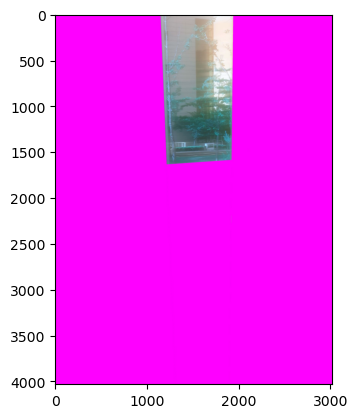

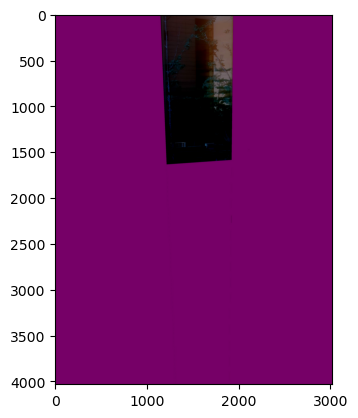

In [76]:
plt.imshow(np.clip(np.asarray(img2, dtype = int), 0, 255))
plt.show()

img2 += - mean2

plt.imshow(np.clip(np.asarray(img2, dtype = int), 0, 255))
plt.show()

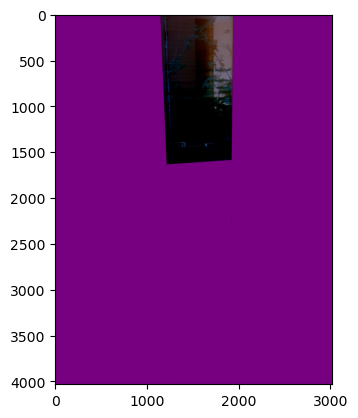

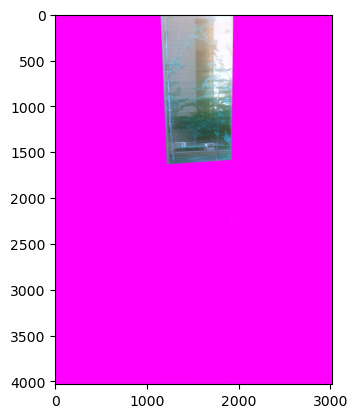

In [77]:
img2 *= std/std2

plt.imshow(np.clip(np.asarray(img2, dtype = int), 0, 255))
plt.show()

img2 += mean

plt.imshow(np.clip(np.asarray(img2, dtype = int), 0, 255))
plt.show()

[256 266 290]
[255 255 255]


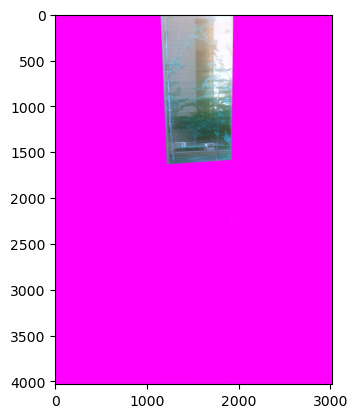

In [78]:
k = np.asarray(img2, dtype = int)
print(np.max(k, axis = (0, 1)))

k = np.clip(k, 0, 255)
print(np.max(k, axis = (0, 1)))

plt.imshow(k)
plt.show()

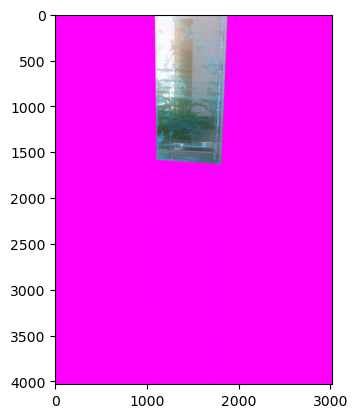

In [79]:
img2 = cv.flip(img2, 1)
img2 = np.clip(np.asarray(img2, dtype = int), 0, 255)
plt.imshow(np.clip(np.asarray(img2, dtype = int), 0, 255))

In [80]:
sift = cv.SIFT_create()
bf =  cv.BFMatcher(cv.NORM_L1)
img = cv.normalize(img, None, 0, 255, cv.NORM_MINMAX).astype('uint8')
img2 = cv.normalize(img2, None, 0, 255, cv.NORM_MINMAX).astype('uint8')


kp2, des2 = sift.detectAndCompute(img2,None)
kp, des = sift.detectAndCompute(img,None)


matches = bf.knnMatch(des, des2, k=2, compactResult = True)
matches = [m1 for m1, m2 in matches if m1.distance < 0.80*m2.distance]


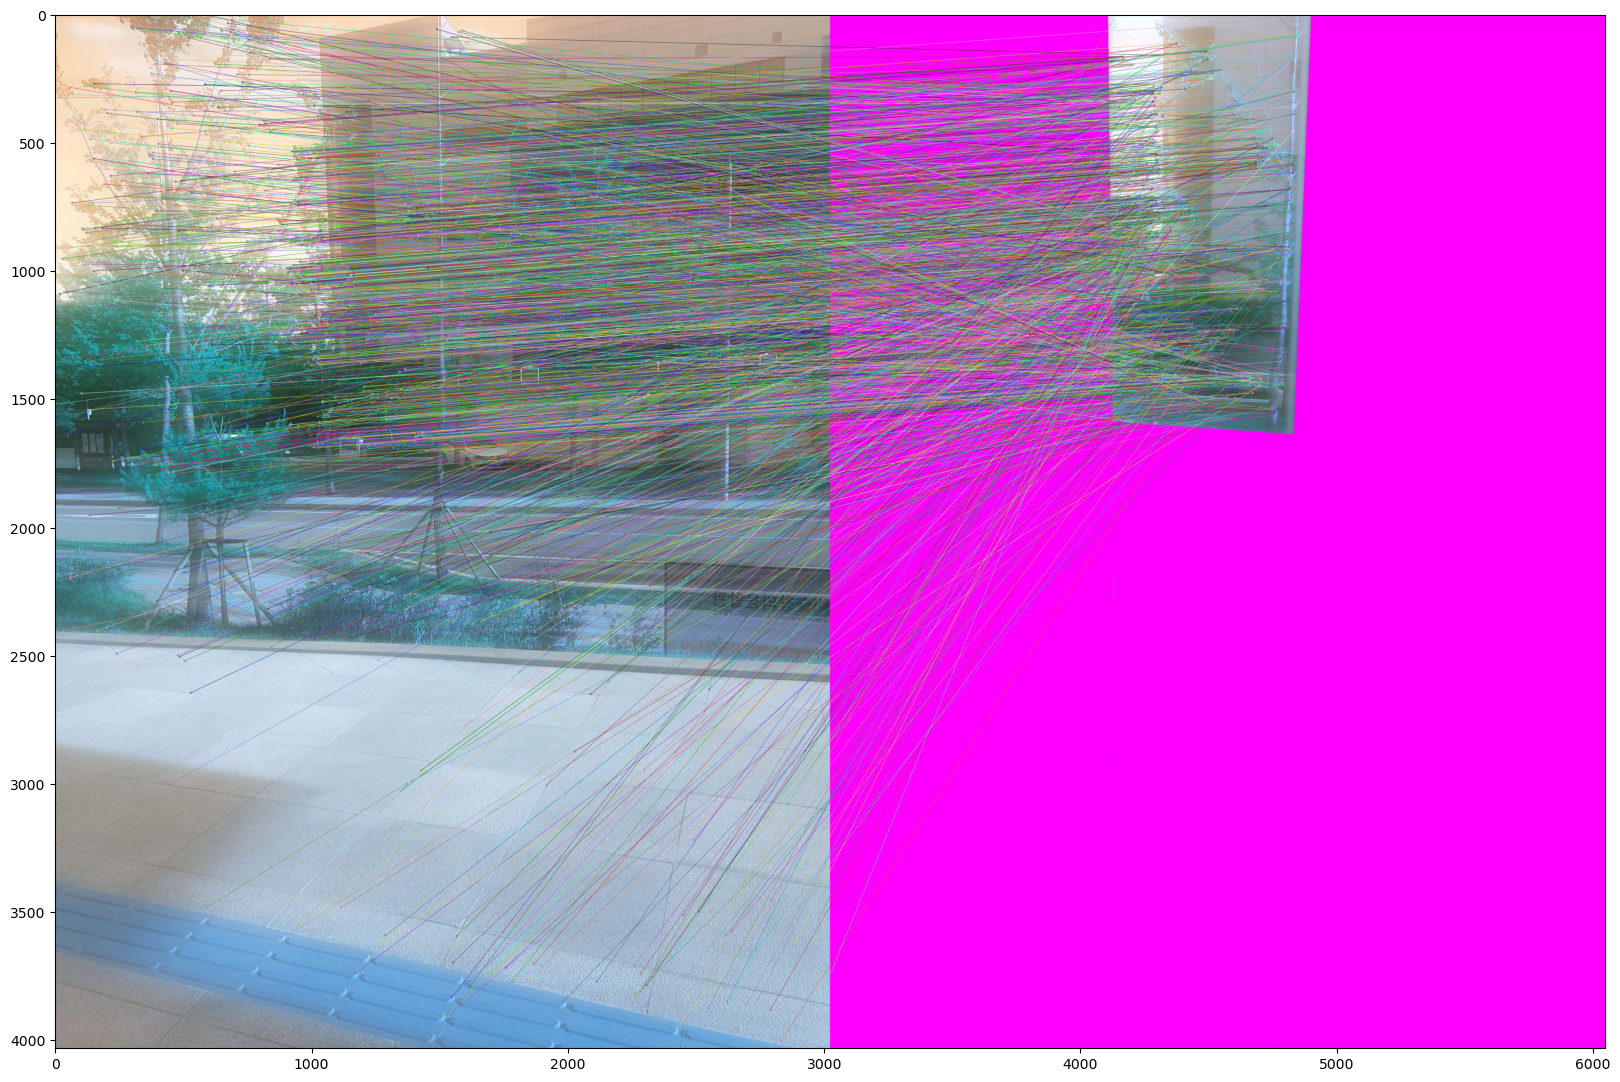

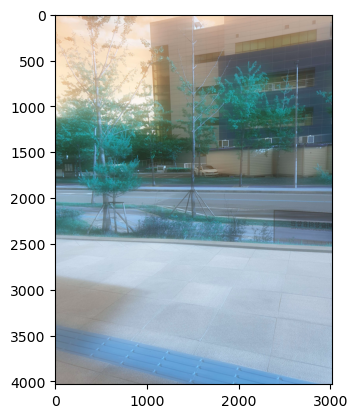

In [81]:
res = cv.drawMatches(img, kp, img2, kp2, matches, img2, flags=2) 

plt.figure(figsize=(20, 20))
plt.imshow(res)
plt.show()
plt.imshow(img)
plt.show()

In [82]:
aa = -0.05236
xx, yy = rotate(1501, 44, aa)
x1, y1 = setpix(xx, yy)
x2, y2 = setpix(1230, 333)
d1, d2 = x2-x1, y2-y1

In [83]:
aasd = [[1085,0],[1879,0],[1104,1589],[1810,1638]]
aasd = [rotate(i[0], i[1], aa) for i in aasd]
sss = [[setpix(i[0],i[1])[0]+d1, setpix(i[0],i[1])[1] + d2] for i in aasd]
aass = [pixset(i[0],i[1]) for i in sss]
aass

[(805.0642990364294, 312.8063987972587),
 (1604.4428319790006, 275.00960209065966),
 (909.7552546214611, 1813.0563129103975),
 (1621.0742401080715, 1824.839661048915)]

In [84]:
img3 = []
for i in range(len(img)):
    temp = []
    for j in range(len(img[0])):
        tempy1 = (aass[0][1] - aass[1][1])/(aass[0][0] - aass[1][0])*(j - aass[0][1]) + aass[0][1]
        tempy2 = (aass[2][1] - aass[3][1])/(aass[2][0] - aass[3][0])*(j - aass[2][1]) + aass[2][1]
        tempx1 = (aass[0][0] - aass[2][0])/(aass[0][1] - aass[2][1])*(i - aass[0][0]) + aass[0][0]
        tempx2 = (aass[1][0] - aass[3][0])/(aass[1][1] - aass[3][1])*(i - aass[1][0]) + aass[1][0]
        
        if(i > tempy1 and i < tempy2 and j > tempx1 and j < tempx2):
            temp.append(img[i][j])
        else :
            temp.append([255, 0, 255])
    img3.append(temp)

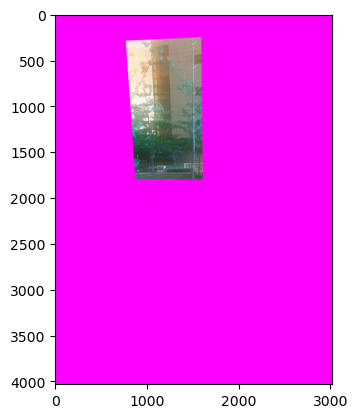

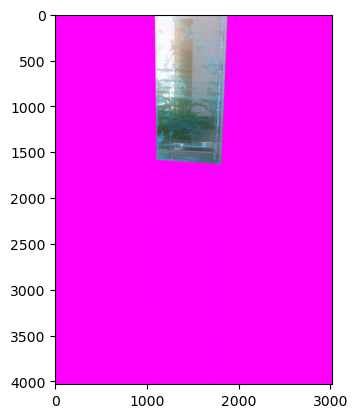

In [85]:
plt.imshow(img3)
plt.show()
plt.imshow(img2)
plt.show()

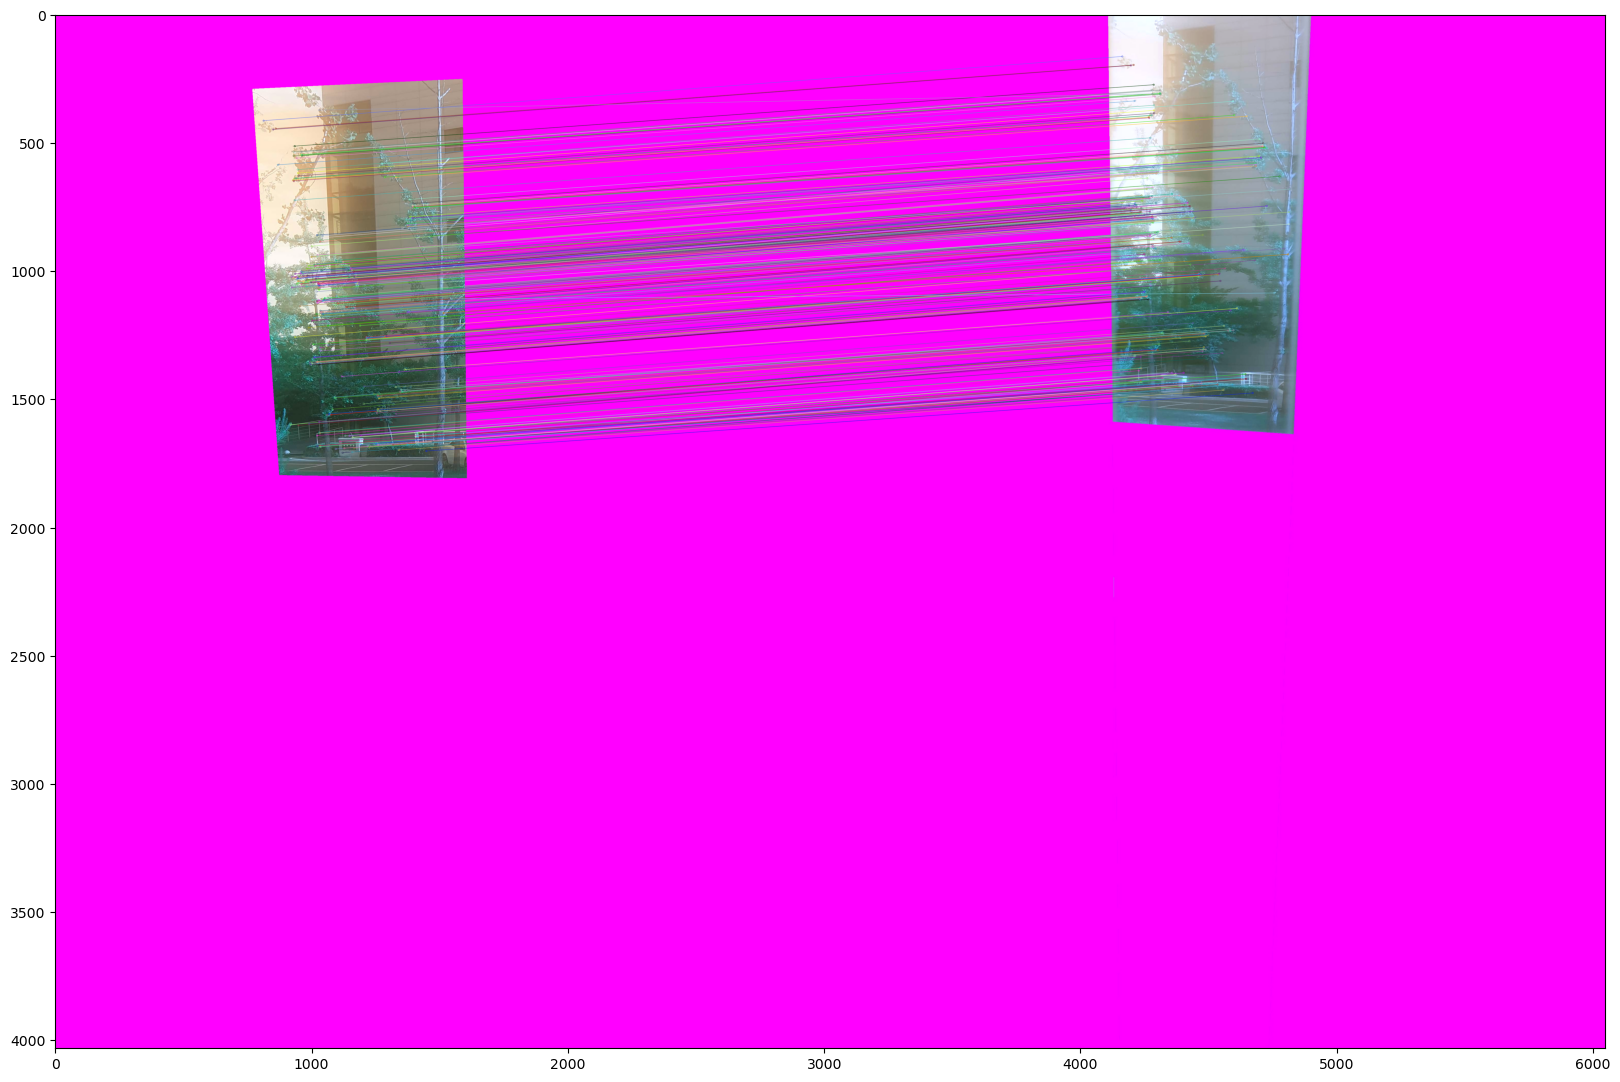

In [86]:
img3 = np.array(img3)
img2 = np.array(img2)
img3 = cv.normalize(img3, None, 0, 255, cv.NORM_MINMAX).astype('uint8')
img2 = cv.normalize(img2, None, 0, 255, cv.NORM_MINMAX).astype('uint8')
sift = cv.SIFT_create()
kp2, des2 = sift.detectAndCompute(img2,None)
kp, des = sift.detectAndCompute(img3,None)


matches = bf.knnMatch(des, des2, k=2, compactResult = True)
matches = [m1 for m1, m2 in matches if m1.distance < 0.60*m2.distance]
res = cv.drawMatches(img3, kp, img2, kp2, matches, img2, flags=2) 

plt.figure(figsize=(20, 20))
plt.imshow(res)
plt.show()

In [87]:
pl,pr,pointl,pointr = get_indexandpoint(matches, kp, kp2)

In [49]:
pl = np.array([[rotate(i[0], i[1], -aa)[0], rotate(i[0], i[1], -aa)[1]] for i in pl])

In [50]:
print(pl)

[[ 790.55837002  457.39995506]
 [ 826.146226    493.60238149]
 [ 836.36895381  490.66511181]
 [ 837.27992203  632.41180889]
 [ 857.931041   1051.5762768 ]
 [ 833.24483248 1646.53350736]
 [ 868.32424809 1071.10229863]
 [ 866.88743612 1112.50816349]
 [ 873.18496326 1075.86883704]
 [ 893.22831991  695.38711096]
 [ 893.22831991  695.38711096]
 [ 901.15593468  584.95810549]
 [ 900.45750416  600.78412283]
 [ 895.56190473  698.39354987]
 [ 898.42283554  689.90787109]
 [ 906.41029237  562.88815446]
 [ 895.47440902  773.69792271]
 [ 906.46099317  589.59152769]
 [ 868.93591251 1306.96035514]
 [ 882.88870362 1060.54453401]
 [ 882.88870362 1060.54453401]
 [ 882.4324395  1073.92241179]
 [ 904.8767709   688.09515022]
 [ 886.11114947 1083.39513505]
 [ 911.79668365  610.74650984]
 [ 886.77738012 1092.31136302]
 [ 886.90608108 1099.2797972 ]
 [ 889.08728567 1079.23268984]
 [ 890.50989716 1096.07619898]
 [ 913.87070019  654.9786018 ]
 [ 913.55031624  668.56498761]
 [ 892.11722503 1077.80116836]
 [ 892.1

In [51]:
print(d2)# 0.08290
a1 = -0.08290
a2 = -0.22689

0.08359888636098978


In [52]:
rr = np.array([[setpix(i[0],i[1])[0], setpix(i[0],i[1])[1]] for i in pr])
ll = np.array([[setpix(i[0],i[1])[0] + a2, setpix(i[0],i[1])[1] + a1] for i in pl])

In [53]:
print(np.array(rr) - np.array(ll))

[[ 3.28186083e-01  1.36969368e-02]
 [ 3.27876786e-01  1.28353866e-02]
 [ 3.28106754e-01  1.31276567e-02]
 [ 3.28968100e-01  1.04585022e-02]
 [ 3.09060623e-01 -1.47487117e-03]
 [ 3.30232783e-01 -7.97490210e-03]
 [ 3.09306551e-01 -1.60696863e-03]
 [ 3.09402332e-01 -1.78811971e-03]
 [ 3.09376326e-01 -1.61053799e-03]
 [ 3.29042186e-01  9.48040820e-03]
 [ 3.29042186e-01  9.48040820e-03]
 [ 3.31157693e-01  1.25485273e-02]
 [ 3.31229328e-01  1.19297630e-02]
 [ 3.29052269e-01  9.35056776e-03]
 [ 3.29077160e-01  9.41086370e-03]
 [ 3.31120292e-01  1.30879712e-02]
 [ 3.30369271e-01  8.86883659e-03]
 [ 3.31180469e-01  1.24812016e-02]
 [ 3.07808772e-01 -3.40722940e-03]
 [ 3.09495512e-01 -1.40924984e-03]
 [ 3.09495512e-01 -1.40924984e-03]
 [ 3.09550992e-01 -1.54562293e-03]
 [ 3.29359554e-01  9.56387054e-03]
 [ 3.09849235e-01 -1.65021835e-03]
 [ 3.31144738e-01  1.20041250e-02]
 [ 3.08872012e-01 -1.85793944e-03]
 [ 3.09655813e-01 -1.66507603e-03]
 [ 3.09463889e-01 -1.65397673e-03]
 [ 3.09565807e-01 -1

In [54]:
aaaaaa = [[get_pt(rr[i][0], rr[i][1], ll[i][0], ll[i][1])[0], get_pt(rr[i][0], rr[i][1], ll[i][0], ll[i][1])[1]] for i in range(len(rr))]

In [55]:
rrrrrr = [[math.tan(i[0]), math.tan(i[1])]for i in aaaaaa]

In [56]:
means = np.mean(rrrrrr,  axis=(0))
print(means)
depth = [[(0-means[0]*j-means[1]*i)/3360 for j in range(len(img3[0]))]for i in range(len(img3))]

[-0.1582352   0.00054945]


In [57]:
print(depth[1][2], depth[1][3], depth[2][2])

9.402409217052771e-05 0.00014111790148368911 9.386056571473263e-05


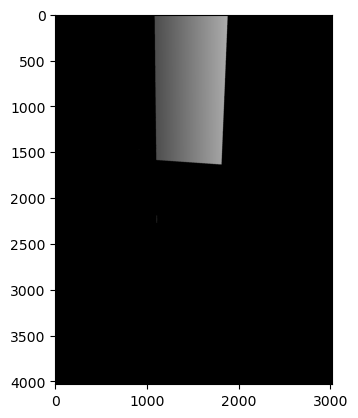

In [71]:
img4 = make_img(depth, 10)


for i in range(len(img4)):
    for j in range(len(img4[0])):
        if img2[i][j][0] > 240 and img2[i][j][2] > 240 and img2[i][j][1] < 30:
            img4[i][j][0] = 0
            img4[i][j][1] = 0
            img4[i][j][2] = 0
plt.imshow(img4)
plt.show()

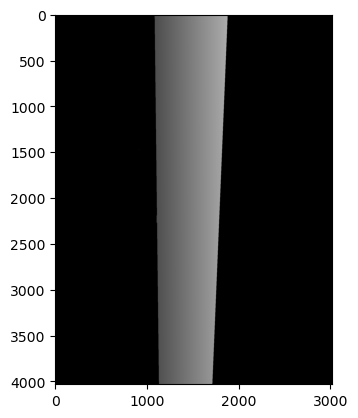

In [90]:
img4 = make_img(depth, 10)
img5 = load_image('test5.jpg')
img5 = cv.flip(img5, 1)
for i in range(len(img4)):
    for j in range(len(img4[0])):
        if img5[i][j][0] > 240 and img5[i][j][2] > 240 and img5[i][j][1] < 30:
            img4[i][j][0] = 0
            img4[i][j][1] = 0
            img4[i][j][2] = 0
plt.imshow(img4)
plt.show()